In [1]:
!pip install git+https://github.com/AAMIASoftwares-research/HCATNetwork.git@google-colab
!pip install git+https://github.com/AAMIASoftwares-research/DatasetUtilities.git@google-colab

  Cloning https://github.com/AAMIASoftwares-research/HCATNetwork.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-req-build-v9zn2flg
  Resolved https://github.com/AAMIASoftwares-research/HCATNetwork.git to commit e94413cce5e4fad1a00a771112bf7e66e3501d4d
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/HCATNetwork.git 'C:\Users\zaira\AppData\Local\Temp\pip-req-build-v9zn2flg'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'


  Cloning https://github.com/AAMIASoftwares-research/DatasetUtilities.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-req-build-5cykr51b
  Resolved https://github.com/AAMIASoftwares-research/DatasetUtilities.git to commit abbffcb17dc017057ea1db6c361aecba70cf76f5
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/AAMIASoftwares-research/HCATNetwork.git (to revision google-colab) to c:\users\zaira\appdata\local\temp\pip-install-qab_4tgu\hcatnetwork_5d6ed8bc10ff4162a1c9b6a50e19db6d
  Resolved https://github.com/AAMIASoftwares-research/HCATNetwork.git to commi

  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/DatasetUtilities.git 'C:\Users\zaira\AppData\Local\Temp\pip-req-build-5cykr51b'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'
  Running command git clone --filter=blob:none --quiet https://github.com/AAMIASoftwares-research/HCATNetwork.git 'C:\Users\zaira\AppData\Local\Temp\pip-install-qab_4tgu\hcatnetwork_5d6ed8bc10ff4162a1c9b6a50e19db6d'
  Running command git checkout -b google-colab --track origin/google-colab
  branch 'google-colab' set up to track 'origin/google-colab'.
  Switched to a new branch 'google-colab'


In [2]:
import hcatnetwork
import HearticDatasetManager
import networkx

In [3]:
import os
import numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
# import graph annotations
from HearticDatasetManager.cat08.dataset import DATASET_CAT08_GRAPHS_RESAMPLED_05MM
from HearticDatasetManager.asoca.dataset import DATASET_ASOCA_GRAPHS_RESAMPLED_05MM_DICT
# import images
from HearticDatasetManager.asoca import AsocaImageCT
from HearticDatasetManager.asoca.dataset import DATASET_ASOCA_IMAGES_DICT
from HearticDatasetManager.cat08 import Cat08ImageCT
from HearticDatasetManager.cat08.dataset import DATASET_CAT08_IMAGES

In [5]:
# data paths
#cat08_dataset_folder = "/kaggle/input/heart-data/CAT08/CAT08"
#asoca_dataset_folder = "/kaggle/input/heart-data/ASOCA/ASOCA"

In [5]:
import pickle 
# import data
folder_img = '/kaggle/input/img-asoca-0/asoca_img_0/kaggle/working/asoca_img_0'
folder_coord = '/kaggle/input/img-asoca-0/coord_asoca_img_0/kaggle/working/coord_asoca_img_0'

with open(folder_img, 'rb') as file:
    image = pickle.load(file)
with open(folder_coord, 'rb') as file:
    coords = pickle.load(file)

In [23]:
image.data.shape

(426, 426, 254)

In [21]:
coords.shape

(426, 426, 254, 4)

In [51]:
# split orignal volume
def split_3d_volume(volume, coordinates, patch_size, overlap):
    patches = []
    for x in range(0, volume.shape[0] - patch_size[0] + 1, overlap[0]):
        for y in range(0, volume.shape[1] - patch_size[1] + 1, overlap[1]):
            for z in range(0, volume.shape[2] - patch_size[2] + 1, overlap[2]):
                patch = volume[x:x+patch_size[0], y:y+patch_size[1], z:z+patch_size[2]]
                coord = coordinates[x:x+patch_size[0], y:y+patch_size[1], z:z+patch_size[2]]
                patches.append({'value': patch, 'coord': coord})
    return patches

volume = image.data
patch_size = (100, 100, 100)
overlap = (100, 100, 100)
patches = split_3d_volume(volume, coords, patch_size, overlap)

In [60]:
patches[0]['value'].shape

(100, 100, 100)

In [36]:
patches['coord'].shape

(100, 100, 100, 4)

In [7]:
del image

In [16]:
del coords

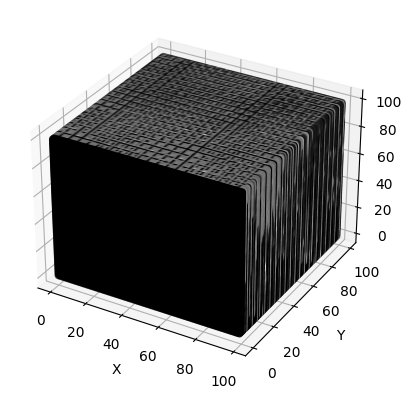

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'patches' is the array containing your patches
patch_to_visualize = patches[0]['value']

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get the shape of the patch
shape = patch_to_visualize.shape

# Create a meshgrid for 3D plotting
x, y, z = np.meshgrid(range(shape[0]), range(shape[1]), range(shape[2]))

# Plot the 3D volume
ax.scatter(x.flatten(), y.flatten(), z.flatten(), c=patch_to_visualize.flatten(), cmap='gray', marker='o')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


In [32]:
abs(patches[0]/1024)

array([[[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1. 

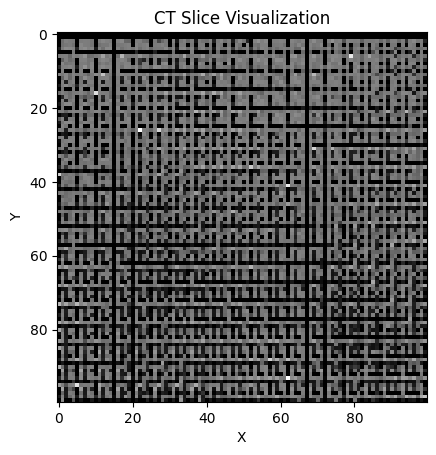

In [62]:
import matplotlib.pyplot as plt

# Assuming 'patches' is the array containing your patches
patch_to_visualize = patches[0]['value']

# Visualize the first slice of the 3D volume
plt.imshow(patch_to_visualize[:, :, 20], cmap='gray')
plt.title('CT Slice Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [50]:
patches['value'][0].shape

(100, 100)